In [ ]:
# import necessary library
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision as tv

In [ ]:
# download data CIFAR10
train_dataset = tv.datasets.CIFAR10(root = "./",train=True,transform=tv.transforms.ToTensor(),download=True)
test_dataset = tv.datasets.CIFAR10(root = "./",train=False,transform=tv.transforms.ToTensor(),download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=20,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size =20,shuffle=False)


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
# setting
MODELNAME = 'cifar10.model'
EPOCH = 30
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [ ]:
# setting model 
class VGG_1LAYER(torch.nn.Module):
    def __init__(self,cfg,name):
        super(VGG_1LAYER,self).__init__()
        self.features = self._make_layers(cfg[name])
        self.classifier = torch.nn.Linear(512, 10)
    def forward(self, x):
        y = self.features(x)
        y = y.view(y.size(0), -1)
        y = self.classifier(y)
        return y
    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [torch.nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [torch.nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           torch.nn.BatchNorm2d(x),
                           torch.nn.ReLU(inplace=True)]
                in_channels = x
        layers += [torch.nn.AvgPool2d(kernel_size=1, stride=1)]
        return torch.nn.Sequential(*layers)


class VGG_2LAYER(torch.nn.Module):
    def __init__(self,cfg,name):
        super(VGG_2LAYER,self).__init__()
        self.features = self._make_layers(cfg[name])
        self.classifier1 = torch.nn.Linear(512, 100)
        self.classifier2 = torch.nn.Linear(100, 10)
    def forward(self, x):
        y = self.features(x)
        y = y.view(y.size(0), -1)
        y = self.classifier1(y)
        y = self.classifier2(y)
        return y
    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [torch.nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [torch.nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           torch.nn.BatchNorm2d(x),
                           torch.nn.ReLU(inplace=True)]
                in_channels = x
        layers += [torch.nn.AvgPool2d(kernel_size=1, stride=1)]
        return torch.nn.Sequential(*layers)



class VGG_3LAYER(torch.nn.Module):
    def __init__(self,cfg,name):
        super(VGG_3LAYER,self).__init__()
        self.features = self._make_layers(cfg[name])
        self.classifier1 = torch.nn.Linear(512, 200)
        self.classifier2 = torch.nn.Linear(200, 100)
        self.classifier3 = torch.nn.Linear(100, 10)
    def forward(self, x):
        y = self.features(x)
        y = y.view(y.size(0), -1)
        y = self.classifier1(y)
        y = self.classifier2(y)
        y = self.classifier3(y)
        return y
    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [torch.nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [torch.nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           torch.nn.BatchNorm2d(x),
                           torch.nn.ReLU(inplace=True)]
                in_channels = x
        layers += [torch.nn.AvgPool2d(kernel_size=1, stride=1)]
        return torch.nn.Sequential(*layers)

In [ ]:
list_loss1=[]
list_accuracy1=[]

# train function
def train_1layer(cfg,name):
    model = VGG_1LAYER(cfg,name).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters())
    for epoch in range(EPOCH):
        loss = 0
        for images, labels in train_loader:
            images = images.view(-1,3,32,32).to(DEVICE)
            labels = labels.to(DEVICE)
            optimizer.zero_grad()
            y = model(images)
            batchloss = F.cross_entropy(y, labels)
            batchloss.backward()
            optimizer.step()
            loss = loss + batchloss.item()
        list_loss1.append(loss)
        print("Epoch",epoch, "Loss:",loss)
        torch.save(model.state_dict(), str(MODELNAME))
        list_accuracy1.append(test_1layer(str(MODELNAME)))

In [ ]:
list_loss2=[]
list_accuracy2=[]

# train function
def train_2layer(cfg,name):
    model = VGG_2LAYER(cfg,name).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters())
    for epoch in range(EPOCH):
        loss = 0
        for images, labels in train_loader:
            images = images.view(-1,3,32,32).to(DEVICE)
            labels = labels.to(DEVICE)
            optimizer.zero_grad()
            y = model(images)
            batchloss = F.cross_entropy(y, labels)
            batchloss.backward()
            optimizer.step()
            loss = loss + batchloss.item()
        list_loss2.append(loss)
        print("Epoch",epoch, "Loss:",loss)
        torch.save(model.state_dict(), str(MODELNAME))
        list_accuracy2.append(test_2layer(str(MODELNAME)))

In [ ]:
list_loss3=[]
list_accuracy3=[]

# train function
def train_3layer(cfg,name):
    model = VGG_3LAYER(cfg,name).to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters())
    for epoch in range(EPOCH):
        loss = 0
        for images, labels in train_loader:
            images = images.view(-1,3,32,32).to(DEVICE)
            labels = labels.to(DEVICE)
            optimizer.zero_grad()
            y = model(images)
            batchloss = F.cross_entropy(y, labels)
            batchloss.backward()
            optimizer.step()
            loss = loss + batchloss.item()
        list_loss3.append(loss)
        print("Epoch",epoch, "Loss:",loss)
        torch.save(model.state_dict(), str(MODELNAME))
        list_accuracy3.append(test_3layer(str(MODELNAME)))

In [ ]:
# test function
def test_1layer(model_name):
    total = len(test_loader.dataset)
    correct = 0
    model = VGG_1LAYER(cfg,"VGG16").to(DEVICE)
    model.load_state_dict(torch.load(model_name))
    model.eval()
    for images, labels in test_loader:
        images = images.view(-1,3,32,32).to(DEVICE)
        labels = labels.to(DEVICE)
        y = model(images)
        pred_labels = y.max(dim = 1)[1]
        correct = correct + (pred_labels == labels).sum()
    print("Correct: ",correct.item())
    print("Total:",total)
    print("Accuracy:", (correct.item()/float(total)))
    return (correct.item()/float(total))

In [ ]:
# test function
def test_2layer(model_name):
    total = len(test_loader.dataset)
    correct = 0
    model = VGG_2LAYER(cfg,"VGG16").to(DEVICE)
    model.load_state_dict(torch.load(model_name))
    model.eval()
    for images, labels in test_loader:
        images = images.view(-1,3,32,32).to(DEVICE)
        labels = labels.to(DEVICE)
        y = model(images)
        pred_labels = y.max(dim = 1)[1]
        correct = correct + (pred_labels == labels).sum()
    print("Correct: ",correct.item())
    print("Total:",total)
    print("Accuracy:", (correct.item()/float(total)))
    return (correct.item()/float(total))

In [ ]:
# test function
def test_3layer(model_name):
    total = len(test_loader.dataset)
    correct = 0
    model = VGG_3LAYER(cfg,"VGG16").to(DEVICE)
    model.load_state_dict(torch.load(model_name))
    model.eval()
    for images, labels in test_loader:
        images = images.view(-1,3,32,32).to(DEVICE)
        labels = labels.to(DEVICE)
        y = model(images)
        pred_labels = y.max(dim = 1)[1]
        correct = correct + (pred_labels == labels).sum()
    print("Correct: ",correct.item())
    print("Total:",total)
    print("Accuracy:", (correct.item()/float(total)))
    return (correct.item()/float(total))

In [ ]:
train_1layer(cfg,"VGG16")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0 Loss: 4126.351665318012
Correct:  4898
Total: 10000
Accuracy: 0.4898
Epoch 1 Loss: 2718.342435389757
Correct:  6127
Total: 10000
Accuracy: 0.6127
Epoch 2 Loss: 2121.764841079712
Correct:  6987
Total: 10000
Accuracy: 0.6987
Epoch 3 Loss: 1694.978852212429
Correct:  7878
Total: 10000
Accuracy: 0.7878
Epoch 4 Loss: 1394.779020436108
Correct:  8005
Total: 10000
Accuracy: 0.8005
Epoch 5 Loss: 1160.230489216745
Correct:  7909
Total: 10000
Accuracy: 0.7909
Epoch 6 Loss: 955.6176755540073
Correct:  8258
Total: 10000
Accuracy: 0.8258
Epoch 7 Loss: 784.1031864862889
Correct:  8290
Total: 10000
Accuracy: 0.829
Epoch 8 Loss: 645.8827979164198
Correct:  8456
Total: 10000
Accuracy: 0.8456
Epoch 9 Loss: 522.4024062622339
Correct:  8234
Total: 10000
Accuracy: 0.8234
Epoch 10 Loss: 435.89686363749206
Correct:  8339
Total: 10000
Accuracy: 0.8339
Epoch 11 Loss: 358.3598560458049
Correct:  8373
Total: 10000
Accuracy: 0.8373
Epoch 12 Loss: 303.8067963270005
Correct:  8493
Total: 10000
Accuracy: 0.8

In [ ]:
test_1layer(str(MODELNAME))

Correct:  8613
Total: 10000
Accuracy: 0.8613


0.8613

In [ ]:
train_2layer(cfg,"VGG16")

Epoch 0 Loss: 4352.605453073978
Correct:  4139
Total: 10000
Accuracy: 0.4139
Epoch 1 Loss: 3029.620086848736
Correct:  5749
Total: 10000
Accuracy: 0.5749
Epoch 2 Loss: 2376.5962529182434
Correct:  6965
Total: 10000
Accuracy: 0.6965
Epoch 3 Loss: 1930.8297021836042
Correct:  7301
Total: 10000
Accuracy: 0.7301
Epoch 4 Loss: 1586.9345594495535
Correct:  7614
Total: 10000
Accuracy: 0.7614
Epoch 5 Loss: 1319.8025358095765
Correct:  7714
Total: 10000
Accuracy: 0.7714
Epoch 6 Loss: 1111.0303102098405
Correct:  8202
Total: 10000
Accuracy: 0.8202
Epoch 7 Loss: 942.9007509928197
Correct:  8353
Total: 10000
Accuracy: 0.8353
Epoch 8 Loss: 788.113081167452
Correct:  8417
Total: 10000
Accuracy: 0.8417
Epoch 9 Loss: 657.6212719911709
Correct:  8323
Total: 10000
Accuracy: 0.8323
Epoch 10 Loss: 553.5201899777167
Correct:  8230
Total: 10000
Accuracy: 0.823
Epoch 11 Loss: 474.38994396314956
Correct:  8321
Total: 10000
Accuracy: 0.8321
Epoch 12 Loss: 391.5641756923869
Correct:  8457
Total: 10000
Accuracy:

In [ ]:
test_2layer(str(MODELNAME))

Correct:  8472
Total: 10000
Accuracy: 0.8472


0.8472

In [ ]:
train_3layer(cfg,"VGG16")

Epoch 0 Loss: 4550.918723344803
Correct:  3703
Total: 10000
Accuracy: 0.3703
Epoch 1 Loss: 3214.993635237217
Correct:  6197
Total: 10000
Accuracy: 0.6197
Epoch 2 Loss: 2463.5508176386356
Correct:  6945
Total: 10000
Accuracy: 0.6945
Epoch 3 Loss: 1997.353444814682
Correct:  7276
Total: 10000
Accuracy: 0.7276
Epoch 4 Loss: 1668.681842803955
Correct:  7803
Total: 10000
Accuracy: 0.7803
Epoch 5 Loss: 1396.7579198405147
Correct:  8089
Total: 10000
Accuracy: 0.8089
Epoch 6 Loss: 1171.564576227218
Correct:  8109
Total: 10000
Accuracy: 0.8109
Epoch 7 Loss: 995.4911542255431
Correct:  8191
Total: 10000
Accuracy: 0.8191
Epoch 8 Loss: 844.8201520144939
Correct:  8237
Total: 10000
Accuracy: 0.8237
Epoch 9 Loss: 705.1381749436259
Correct:  8325
Total: 10000
Accuracy: 0.8325
Epoch 10 Loss: 591.3795203734189
Correct:  8313
Total: 10000
Accuracy: 0.8313
Epoch 11 Loss: 502.66788962855935
Correct:  8253
Total: 10000
Accuracy: 0.8253
Epoch 12 Loss: 418.0894282304216
Correct:  8365
Total: 10000
Accuracy: 

In [ ]:
test_3layer(str(MODELNAME))

Correct:  8521
Total: 10000
Accuracy: 0.8521


0.8521

In [ ]:
df_ac = pd.DataFrame()
df_lo = pd.DataFrame()
df_ac["1 Layer"] = list_accuracy1
df_ac["2 Layer"] = list_accuracy2
df_ac["3 Layer"] = list_accuracy3
df_ac = df_ac.reset_index()
df_ac.rename(columns={'index':'Epoch'}, inplace=True)
df_ac = df_ac.melt(id_vars='Epoch').rename(columns=str.title)
df_lo["1 Layer"] = list_loss1
df_lo["2 Layer"] = list_loss2
df_lo["3 Layer"] = list_loss3
df_lo = df_lo.reset_index()
df_lo.rename(columns={'index':'Epoch'}, inplace=True)
df_lo = df_lo.melt(id_vars='Epoch').rename(columns=str.title)

In [ ]:
print(df_ac)
print(df_lo)

    Epoch Variable   Value
0       0  1 Layer  0.4898
1       1  1 Layer  0.6127
2       2  1 Layer  0.6987
3       3  1 Layer  0.7878
4       4  1 Layer  0.8005
..    ...      ...     ...
85     25  3 Layer  0.8425
86     26  3 Layer  0.8416
87     27  3 Layer  0.8504
88     28  3 Layer  0.8497
89     29  3 Layer  0.8521

[90 rows x 3 columns]
    Epoch Variable        Value
0       0  1 Layer  4126.351665
1       1  1 Layer  2718.342435
2       2  1 Layer  2121.764841
3       3  1 Layer  1694.978852
4       4  1 Layer  1394.779020
..    ...      ...          ...
85     25  3 Layer   124.996341
86     26  3 Layer   124.915283
87     27  3 Layer   112.702953
88     28  3 Layer   113.978677
89     29  3 Layer   106.234030

[90 rows x 3 columns]


In [ ]:
df_ac.rename(columns={'Variable':'Accuracy'}, inplace=True)
df_lo.rename(columns={'Variable':'Loss'}, inplace=True)

In [ ]:
# visualization
def Visualization(df_lo,df_ac):
  matplotlib.rc_file_defaults()
  ax1 = sns.set_style(style=None, rc=None )
  fig, ax1 = plt.subplots(figsize=(12,6))
  g = sns.barplot(x='Epoch', y='Value', hue= 'Loss', data = df_lo, alpha=1, ax=ax1)
  ax2 = ax1.twinx()
  sns.lineplot(x='Epoch', y='Value', hue= 'Accuracy',data = df_ac, marker='o', ax=ax2)

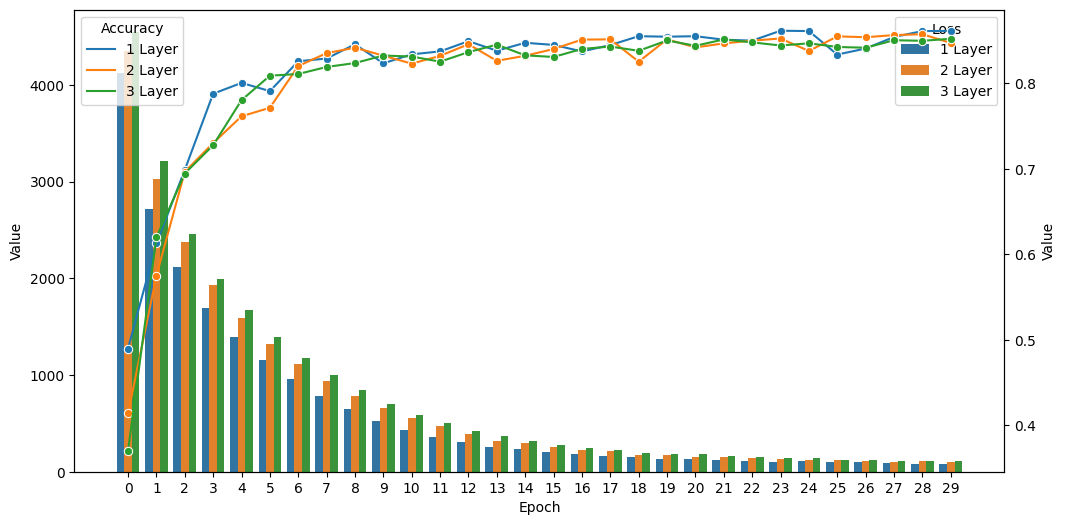

In [ ]:
Visualization(df_lo,df_ac)